In [1]:
import pandas as pd                       #Import libraries
import numpy as np 
import seaborn as sns                    
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('covid_19_country_wise_latest.csv')

In [4]:
df.head(5)

,Unnamed: 0,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,0,Afghanistan,36263,1269,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,1,Albania,4880,144,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,2,Algeria,27973,1163,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,3,Andorra,907,52,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,4,Angola,950,41,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa


In [6]:
df.set_index("Unnamed: 0",inplace=True)     #set data set index  is unmaned

In [9]:
df.index.name = "index"        #replace index name 

In [11]:
def fix_columns(df):                                          # create function replace space with undersoce
    df.columns = df.columns.str.replace(" ", "_")
    return df

# Use the function
df = fix_columns(df)


In [13]:
df.columns     #checking columns name 

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New_cases', 'New_deaths', 'New_recovered', 'Deaths_/_100_Cases',
       'Recovered_/_100_Cases', 'Deaths_/_100_Recovered',
       'Confirmed_last_week', '1_week_change', '1_week_%_increase',
       'WHO_Region'],
      dtype='object')

In [14]:
df.info()     #checking data types 

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    object 
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New_cases               177 non-null    float64
 6   New_deaths              177 non-null    float64
 7   New_recovered           187 non-null    int64  
 8   Deaths_/_100_Cases      187 non-null    float64
 9   Recovered_/_100_Cases   187 non-null    float64
 10  Deaths_/_100_Recovered  187 non-null    float64
 11  Confirmed_last_week     187 non-null    int64  
 12  1_week_change           187 non-null    int64  
 13  1_week_%_increase       187 non-null    float64
 14  WHO_Region              187 non-null    object 

In [16]:
df.isnull().sum()    #checking nan values 

Country/Region             0
Confirmed                  0
Deaths                     0
Recovered                  0
Active                     0
New_cases                 10
New_deaths                10
New_recovered              0
Deaths_/_100_Cases         0
Recovered_/_100_Cases      0
Deaths_/_100_Recovered     0
Confirmed_last_week        0
1_week_change              0
1_week_%_increase          0
WHO_Region                 0
dtype: int64

In [24]:
df['New_cases'].fillna(df['New_cases'].mode()[0], inplace=True)
df['New_deaths'].fillna(df['New_deaths'].mode()[0], inplace=True)   #fill nan values using mean 

In [27]:
df['Country/Region'].nunique()      #count countries 

187

In [31]:
df['Country/Region'].duplicated().sum()

0

In [36]:
mean_cases = df['Confirmed'].mean()
median_cases = df['Confirmed'].median()
std_cases = df['Confirmed'].std()
print(mean_cases)
print(median_cases)
print(std_cases)

88130.935828877
5059.0
383318.66383061546


In [42]:
# Convert the column to numeric, forcing errors to NaN
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')

# Fill NaN values (which were strings) with the mean of the column
df['Deaths'].fillna(df['Deaths'].mean(), inplace=True)


In [45]:
df['Deaths'].dtype

dtype('int32')

In [46]:
df['Deaths'] = df['Deaths'].astype(int)

In [47]:
df['Deaths'].sum()

657516

In [48]:
df['Recovered'].sum()

9468087

In [51]:
high_cases = df[df['Confirmed'] > 1000000]  # Filter countries with cases > 1M
count = high_cases['Country/Region'].nunique()  # Count unique countries

print(count)


3


In [54]:
df['Recovered'] = (df['Recovered'] / df['Confirmed']) * 100  # Calculate recovery rate
high_recovery = df[df['Recovered'] > 95]  # Filter countries with > 95% recovery rate

countries = high_recovery['Country/Region'].unique()  # Get unique country names
print(countries)


['Antigua and Barbuda' 'Belize' 'Dominica' 'Fiji' 'Greenland' 'Grenada'
 'Holy See' 'Laos' 'Liechtenstein' 'Saint Kitts and Nevis' 'Saint Lucia'
 'Saint Vincent and the Grenadines' 'Western Sahara']


In [77]:
df = df.drop(columns=['WHO_Region', 'Confirmed'])

In [78]:
print(df[['Country/Region', 'Deaths']].max())

Country/Region    Zimbabwe
Deaths              148011
dtype: object


In [79]:
df[['Country/Region', 'Deaths']].sort_values(by='Deaths', ascending=False)  #sort countries in desnding order 


,Country/Region,Deaths
index,,
173,US,148011
23,Brazil,87618
177,United Kingdom,45844
111,Mexico,44022
85,Italy,35112
...,...,...
19,Bhutan,0
130,Papua New Guinea,0
75,Holy See,0


In [81]:
df['Total_cases'] = df['Deaths'] + df['Recovered'] + df['Active']  

In [83]:
df['Death_Rate'] = (df['Deaths'] / df['Total_cases']) * 100      

In [85]:
low_death_countries = df[(df['Total_cases'].diff() > 0) & (df['Death_Rate'] < 2)]
print(low_death_countries[['Country/Region', 'Total_cases', 'Death_Rate']])


              Country/Region   Total_cases  Death_Rate
index                                                 
28                   Burundi     82.573026    1.211049
41                Costa Rica  12017.000962    0.956978
49                  Dominica   3086.419753    0.000000
68                 Greenland   4738.609329    0.000000
75                  Holy See   6944.444444    0.000000
84                    Israel  36852.000104    1.286226
89                Kazakhstan  30244.000090    1.934268
106                 Maldives    822.066608    1.824670
118                  Namibia   1742.016134    0.459238
119                    Nepal   4998.002086    0.960384
127                     Oman  20030.000125    1.962057
140    Saint Kitts and Nevis   3055.124364    0.000000
150                Singapore   5146.000348    0.524679
179               Uzbekistan   9535.001224    1.269009
182       West Bank and Gaza   6869.003132    1.135536
183           Western Sahara   8002.000000    0.012497


In [88]:
low_death_countries = df[(df['Total_cases'].diff() > 0) & (df['Death_Rate'] < 2)]
print(low_death_countries[['Country/Region', 'Total_cases', 'Death_Rate']])


              Country/Region   Total_cases  Death_Rate
index                                                 
28                   Burundi     82.573026    1.211049
41                Costa Rica  12017.000962    0.956978
49                  Dominica   3086.419753    0.000000
68                 Greenland   4738.609329    0.000000
75                  Holy See   6944.444444    0.000000
84                    Israel  36852.000104    1.286226
89                Kazakhstan  30244.000090    1.934268
106                 Maldives    822.066608    1.824670
118                  Namibia   1742.016134    0.459238
119                    Nepal   4998.002086    0.960384
127                     Oman  20030.000125    1.962057
140    Saint Kitts and Nevis   3055.124364    0.000000
150                Singapore   5146.000348    0.524679
179               Uzbekistan   9535.001224    1.269009
182       West Bank and Gaza   6869.003132    1.135536
183           Western Sahara   8002.000000    0.012497


In [96]:
df[['Country/Region', 'Death_Rate']].head()

,Country/Region,Death_Rate
index,,
0,Afghanistan,11.468594
1,Albania,6.744656
2,Algeria,12.729859
3,Andorra,49.487895
4,Angola,5.788653


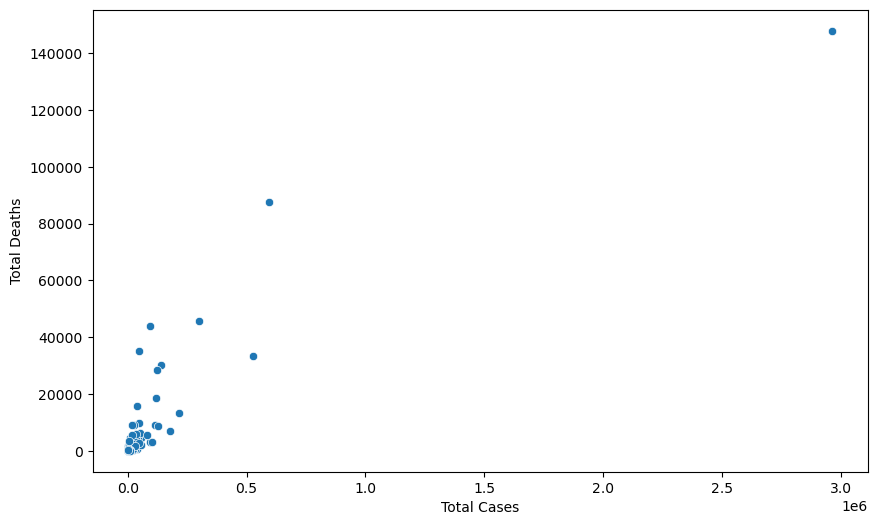

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Total_cases'], y=df['Deaths'])

plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')

plt.show()

In [98]:
df.to_csv("updated_covid19_counrty_ wise.csv",index=False)